<a href="https://colab.research.google.com/github/ArthurSehnem/styllify/blob/main/styllify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

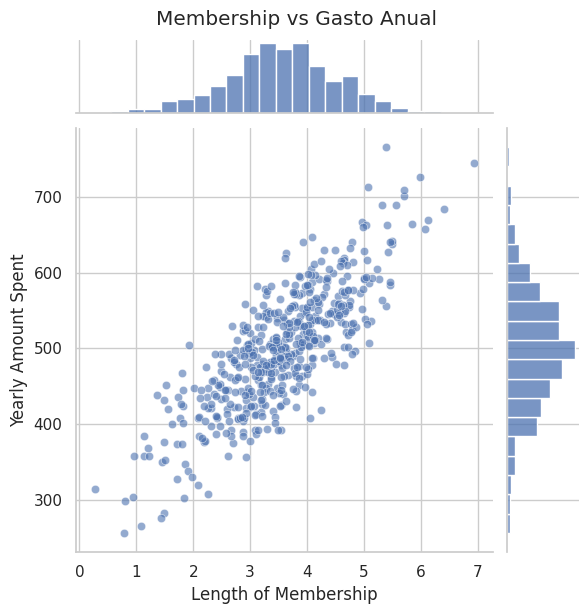

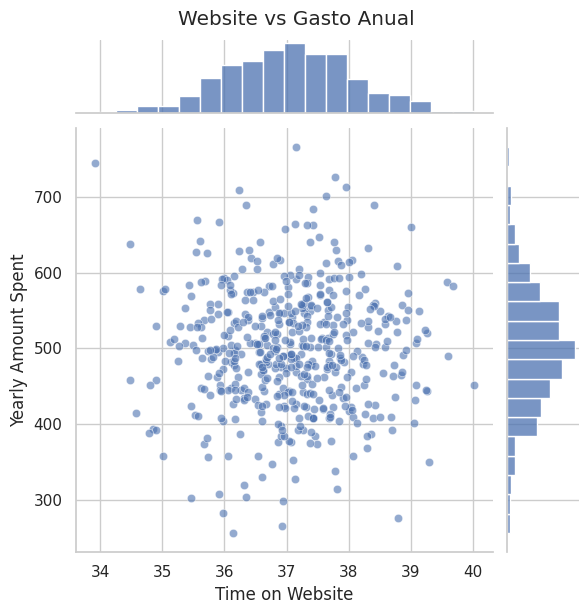

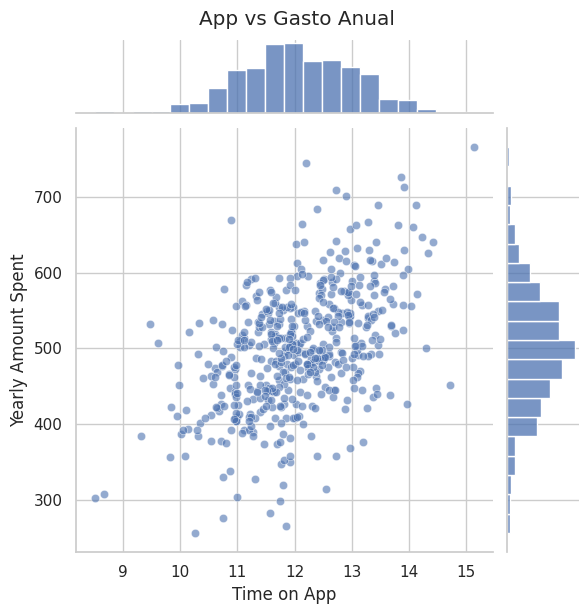

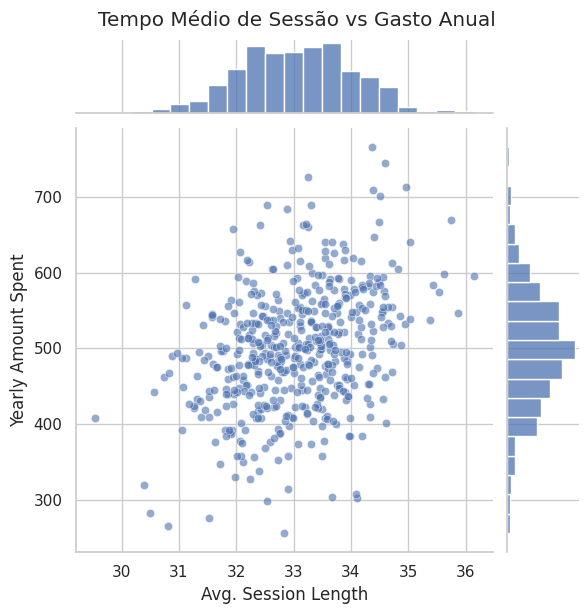

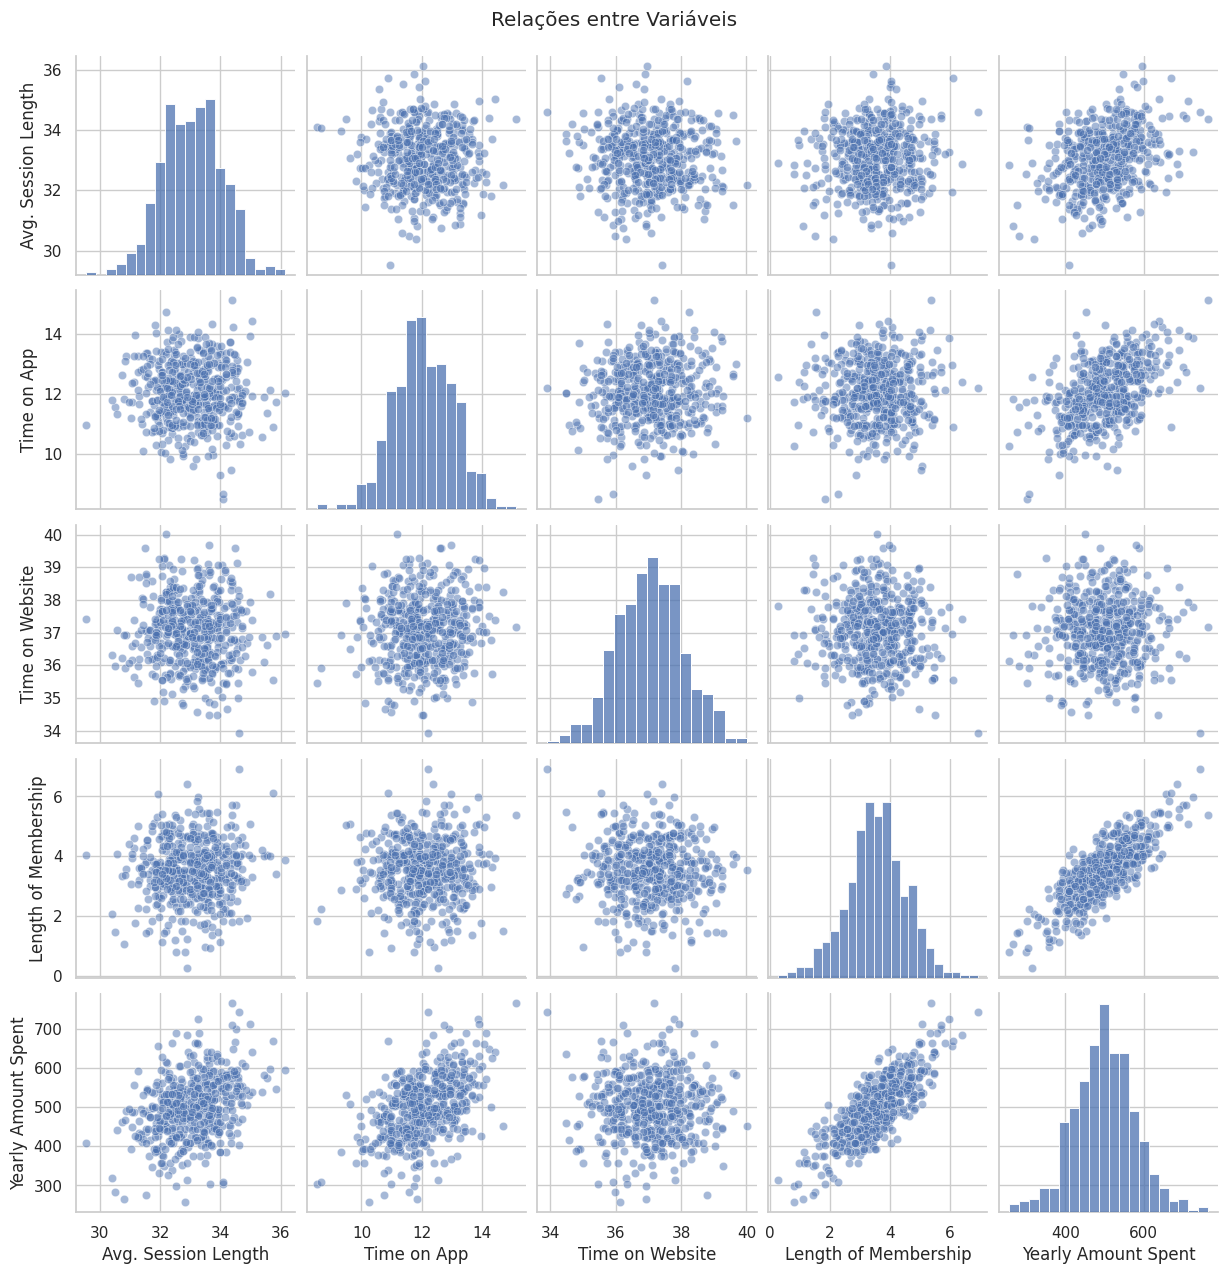

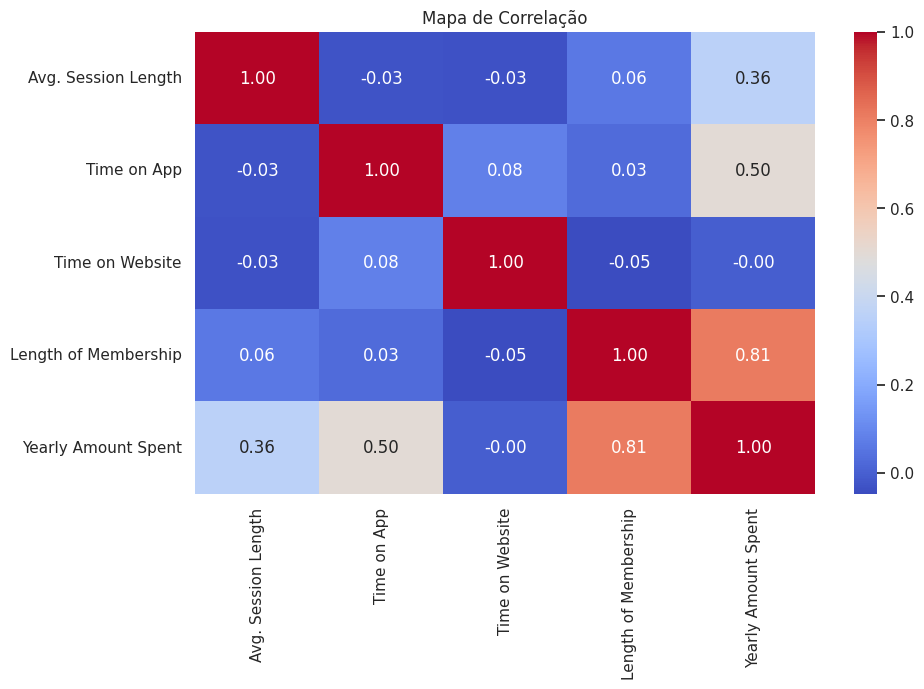

Métricas de Avaliação:
MSE: 103.91554136503333
MAE: 8.426091641432116
RMSE: 10.193897260863155
R²: 0.9808757641125855

Coeficientes da Regressão:
                      Coeficiente
Avg. Session Length     25.724256
Time on App             38.597135
Time on Website          0.459148
Length of Membership    61.674732


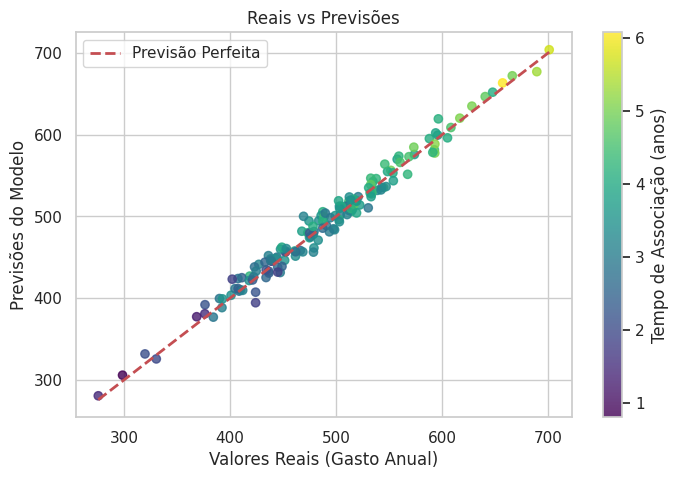

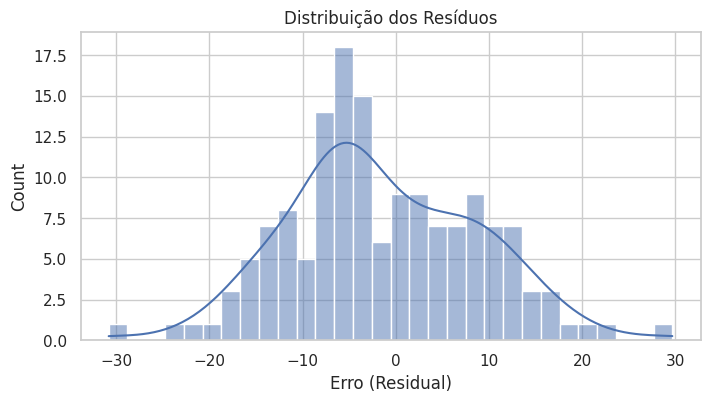

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Estilo dos gráficos
sns.set(style='whitegrid')

# ============================
# 1. Carregamento dos dados
# ============================
df = pd.read_csv("Ecommerce Customers")

# ============================
# 2. Seleção de features
# ============================
features = ['Avg. Session Length', 'Time on App', 'Time on Website',
            'Length of Membership', 'Yearly Amount Spent']
df = df[features]

# ============================
# 3. Visualizações exploratórias
# ============================

# Relações individuais com o gasto anual
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=df, alpha=0.6)
plt.suptitle("Membership vs Gasto Anual", y=1.02)
plt.show()

sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, alpha=0.6)
plt.suptitle("Website vs Gasto Anual", y=1.02)
plt.show()

sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, alpha=0.6)
plt.suptitle("App vs Gasto Anual", y=1.02)
plt.show()

sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent', data=df, alpha=0.6)
plt.suptitle("Tempo Médio de Sessão vs Gasto Anual", y=1.02)
plt.show()

# Matriz de dispersão entre todas as variáveis
sns.pairplot(df, kind='scatter', plot_kws=dict(alpha=0.5))
plt.suptitle("Relações entre Variáveis", y=1.02)
plt.show()

# Mapa de correlação
correlacao = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação")
plt.show()

# ============================
# 4. Preparação para o modelo
# ============================
X = df.drop('Yearly Amount Spent', axis=1)
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ============================
# 5. Treinamento do modelo
# ============================
model = LinearRegression()
model.fit(X_train, y_train)

# ============================
# 6. Avaliação do modelo
# ============================
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Métricas de Avaliação:")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# ============================
# 7. Coeficientes
# ============================
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes da Regressão:")
print(coefficients)

# ============================
# 8. Gráficos de desempenho
# ============================

# Reais vs Previsões
cores = X_test['Length of Membership']  # Pode trocar por qualquer outra

plt.figure(figsize=(8,5))
scatter = plt.scatter(x=y_test, y=predictions, c=cores, cmap='viridis', alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Previsão Perfeita')

plt.xlabel("Valores Reais (Gasto Anual)")
plt.ylabel("Previsões do Modelo")
plt.title("Reais vs Previsões")
plt.grid(True)

# Barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label("Tempo de Associação (anos)")

plt.legend()
plt.show()



# Distribuição dos resíduos
residuals = y_test - predictions
plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro (Residual)")
plt.grid(True)
plt.show()

In [ ]:
def prever_gasto_anual(avg_session_length, time_on_app, time_on_website, length_of_membership):
    novo_cliente = pd.DataFrame({
        'Avg. Session Length': [avg_session_length],
        'Time on App': [time_on_app],
        'Time on Website': [time_on_website],
        'Length of Membership': [length_of_membership]
    })

    predicao = model.predict(novo_cliente)[0]
    print(f"Previsão de gasto anual: R${predicao:,.2f}")
    return predicao

prever_gasto_anual(
    avg_session_length = 33,
    time_on_app = 12,
    time_on_website = 9,
    length_of_membership = 5
)